<a href="https://colab.research.google.com/github/VimalMollyn/ED6001-Term-Project/blob/colab/Preprocessing/4.%20Save%20patches%20of%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!git clone -b colab https://github.com/VimalMollyn/ED6001-Term-Project.git

Cloning into 'ED6001-Term-Project'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 83 (delta 31), reused 40 (delta 11), pack-reused 0
Unpacking objects: 100% (83/83), done.


In [1]:
import numpy as np
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
import pandas as pd

train = pd.read_csv('/content/ED6001-Term-Project/Preprocessing/train.csv')
test = pd.read_csv('/content/ED6001-Term-Project/Preprocessing/test.csv')

path_to_data = Path("/content/drive/MyDrive/ED6001_MIA_Term_Project/data/")
path_to_noise = Path("/content/drive/MyDrive/ED6001_MIA_Term_Project/noisy/")
path_to_data_patches = Path("/content/drive/MyDrive/ED6001_MIA_Term_Project/patches/data/")
path_to_noise_patches = Path("/content/drive/MyDrive/ED6001_MIA_Term_Project/patches/noisy/")

path_to_data_patches.mkdir(parents=True, exist_ok=True)
path_to_noise_patches.mkdir(parents=True, exist_ok=True)

(256, 256, 136)
(6, 32, 32)
(1, 1, 6, 32, 32)


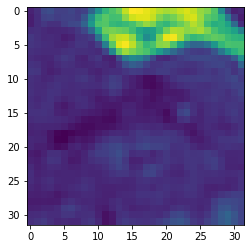

In [3]:
# generate sample patch

size = 32
depth = 6

sample_file = path_to_data / train["filepath"].iloc[0]
sample_nii_img = nib.load(sample_file)
sample_img = sample_nii_img.get_fdata()
print(sample_img.shape)

middle = sample_img.shape[-1]//2
patch = sample_img[128:128+size, 128:128+size, middle-depth//2:middle+depth//2].copy().transpose(2, 0, 1)
print(patch.shape)
patch = np.reshape(patch, (1, 1, depth, size, size))
print(patch.shape)

plt.imshow(patch[0, 0, 1])

In [4]:
size = 32
depth = 6
stride = 8


files = pd.concat([train['filepath'], test['filepath']])

num = 0
for file in tqdm_notebook(files):
    free_img = nib.load(path_to_data / file).get_fdata()
    noised_img = nib.load(path_to_noise / file).get_fdata()
    free_img_set = []
    noised_img_set = []
    height, width, _ = free_img.shape
    middle = free_img.shape[-1]//2

    for y in range(0, height - size, stride):
        for x in range(0, width - size, stride):
            free_img_temp = free_img[y : y + size, x : x + size, middle-depth//2:middle+depth//2].copy().transpose(2, 0, 1)
            noised_img_temp = noised_img[y : y + size, x : x + size, middle-depth//2:middle+depth//2].copy().transpose(2, 0, 1)
            free_img_temp = np.reshape(free_img_temp, (1, 1, depth, size, size))
            noised_img_temp = np.reshape(noised_img_temp, (1, 1, depth, size, size))

            free_img_set.append(free_img_temp)
            noised_img_set.append(noised_img_temp)

    num += 1
    free_img_set = np.stack(free_img_set, axis=0)
    noised_img_set = np.stack(noised_img_set, axis=0)

    np.save(path_to_data_patches / f'{num}.npy', free_img_set)
    np.save(path_to_noise_patches / f'{num}.npy', noised_img_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/110 [00:00<?, ?it/s]